## Mini Project 3: Recommendation Engine using Collaborative Filtering

A __recommender system__ is a subclass of information filtering system that seeks to predict the “rating” or “preference” a user would give to an item. 

Recommender systems are utilized in a variety of areas including:
1. movies
2. music
3. news
4. books
5. research articles
6. search queries
7. social tags
8. product

There are 3 types of Recommendation Engines:
1. Collaborative filtering<br/>
&nbsp; &nbsp;User-based filtering<br/>
&nbsp; &nbsp;Item-based filtering
2. Content-based filtering
3. Hybrid recommender system

## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display 


In [19]:
data = pd.read_csv('data/ratings.csv')


In [20]:
data.shape

(1149780, 3)

In [21]:
data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [22]:
data.info

<bound method DataFrame.info of          User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]>

In [23]:
data['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

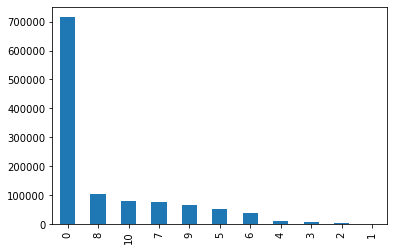

In [24]:
data['Book-Rating'].value_counts().plot(kind='bar')
plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [26]:
data.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### Choose to drop rows with rating 0, assume that user didnt leave rating

In [30]:
data.drop(data[data['Book-Rating']==0].index, inplace=True)

In [31]:
data['Book-Rating'].value_counts()

8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

## Data Processing

In [32]:
from surprise import Reader, Dataset
reader = Reader(rating_scale = (1, 10))
data = Dataset.load_from_df(data[['User-ID', 'ISBN', 'Book-Rating']], reader)

## Model Training

In [33]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

In [37]:
from surprise import SVD, accuracy
algo = SVD(n_epochs = 40, n_factors = 50, verbose = True)
algo.fit(trainset)

# cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39


In [38]:
predictions = algo.test(testset)

In [44]:
predictions

[Prediction(uid=236340, iid='0679408193', r_ui=7.0, est=7.4502662475488854, details={'was_impossible': False}),
 Prediction(uid=11365, iid='0440229499', r_ui=8.0, est=8.044348865539227, details={'was_impossible': False}),
 Prediction(uid=217121, iid='0060938455', r_ui=8.0, est=7.964593020771279, details={'was_impossible': False}),
 Prediction(uid=239468, iid='014504894', r_ui=5.0, est=6.680163531012892, details={'was_impossible': False}),
 Prediction(uid=114988, iid='0140244883', r_ui=10.0, est=7.162042593067407, details={'was_impossible': False}),
 Prediction(uid=249791, iid='0385116322', r_ui=7.0, est=6.898765743318836, details={'was_impossible': False}),
 Prediction(uid=104939, iid='0743410327', r_ui=7.0, est=7.554836538925428, details={'was_impossible': False}),
 Prediction(uid=178920, iid='0062506587', r_ui=9.0, est=7.775858190869035, details={'was_impossible': False}),
 Prediction(uid=149907, iid='1573220825', r_ui=10.0, est=9.930497651982053, details={'was_impossible': False}),


## Model Evaluation

In [39]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 1.6483


1.648252910431458

## Model Deployment

In [43]:
user_id = 30
product_id =30
predicted_rating = algo.predict(str(user_id), str(product_id))

In [41]:
predicted_rating

Prediction(uid='30', iid='30', r_ui=None, est=7.600627818959395, details={'was_impossible': False})

In [53]:
predictions[0]

Prediction(uid=236340, iid='0679408193', r_ui=7.0, est=7.4502662475488854, details={'was_impossible': False})

In [45]:
recommendations = [pred for pred in predictions if pred[0] == 2858]

In [46]:
recommendations

[]

In [50]:
from collections import defaultdict

def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
    return top_n

all_pred = get_all_predictions(predictions)

In [ ]:
new_all_pred=dict(filter(lambda elem: len(elem[1]) != 1, all_pred.items()))

In [57]:
n = 1
new_all_pred = all_pred.copy()
for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    new_all_pred[uid] = user_ratings[:n]
    
tmp = pd.DataFrame.from_dict(new_all_pred)
tmp_transpose = tmp.transpose()

In [60]:
tmp_transpose

,0
236340,"(0684862719, 8.419146417857851)"
11365,"(0440229499, 8.044348865539227)"
217121,"(0385504209, 9.456477211146511)"
239468,"(0330301624, 7.51572131454711)"
114988,"(0062502182, 10)"
...,...
23500,"(0842374193, 7.600627818959395)"
205200,"(0671024094, 7.674792764450228)"
165356,"(3423362995, 7.675686775838715)"
64053,"(1903650267, 7.389636574795205)"


In [84]:
# Make Top 4 recommendations based on user id.
# Question: What movies does user_id = 2134 like?

def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

user_id=23500
results = get_predictions(user_id)
results

0    (0842374193, 7.600627818959395)
Name: 23500, dtype: object

### Load books information

In [65]:
book_info_path = r"data/Books.csv"
df_book_info = pd.read_csv(book_info_path)

C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [67]:
df_book_info.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [85]:
def find_book_info(ISBN):
    return df_book_info[df_book_info['ISBN']==ISBN]

In [86]:
# Question: What are the names of these movies?
for item in results:
    print(item[0][1])
    info = find_book_info(item[0][1])
    print(info)

8
Empty DataFrame
Columns: [ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L]
Index: []


In [89]:
find_book_info('0002005018')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


### Do recommendations

In [98]:
user = 205200
recommendations = get_predictions(user)
book = find_book_info(recommendations[0][0])
print(book)


            ISBN                                         Book-Title  \
7939  0671024094  The Coffin Dancer (Lincoln Rhyme Novels (Paper...   

         Book-Author Year-Of-Publication     Publisher  \
7939  Jeffery Deaver                1999  Pocket Books   

                                            Image-URL-S  \
7939  http://images.amazon.com/images/P/0671024094.0...   

                                            Image-URL-M  \
7939  http://images.amazon.com/images/P/0671024094.0...   

                                            Image-URL-L  
7939  http://images.amazon.com/images/P/0671024094.0...  


'0671024094'